In [560]:
import numpy as np
import pandas as pd
import numpy as np

In [429]:
import datetime as dt

In [301]:
from matplotlib.pyplot import figure

In [302]:
import warnings
warnings.filterwarnings('ignore')

In [303]:
query = """
SELECT
  day, merchant_id, gateway, tpv
FROM
  `cb-datawarehouse-prod.rs_prod.daily_tpv`
 
 
"""

In [304]:
from google.cloud import bigquery

In [305]:
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud import bigquery_storage

In [306]:
import pandas_gbq

In [307]:
key_path = "/Users/cb-it-01-1463/Downloads/cb-analytics-internal.json"
credentials = service_account.Credentials.from_service_account_file(key_path,)

In [308]:
df = pandas_gbq.read_gbq(query, project_id="cb-datawarehouse-prod", credentials=credentials)

Downloading: 100%|████████████████| 5036037/5036037 [09:10<00:00, 9150.59rows/s]


In [309]:
df.head(10)

,day,merchant_id,gateway,tpv
0,2020-10-01 00:00:00+00:00,5921,AMAZON_PAYMENTS,2110.80
1,2017-08-31 00:00:00+00:00,88024,WORLDPAY,112512.59
2,2017-04-20 00:00:00+00:00,6336,SAGE_PAY,2857.19
3,2021-11-17 00:00:00+00:00,107038,INGENICO_EPAYMENTS,733.52
4,2021-10-30 00:00:00+00:00,134614,PAYPAL_PAYFLOW_PRO,624.00
5,2021-10-26 00:00:00+00:00,70500,CHECKOUT_COM,20659.53
6,2021-10-18 00:00:00+00:00,66750,CHECKOUT_COM,16458.98
7,2021-10-11 00:00:00+00:00,121247,CHECKOUT_COM,742.01
8,2021-09-13 00:00:00+00:00,108347,CHECKOUT_COM,11838.70
9,2020-08-24 00:00:00+00:00,44178,BLUESNAP,1050.29


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5036037 entries, 0 to 5036036
Data columns (total 4 columns):
 #   Column       Dtype              
---  ------       -----              
 0   day          datetime64[ns, UTC]
 1   merchant_id  Int64              
 2   gateway      object             
 3   tpv          float64            
dtypes: Int64(1), datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 158.5+ MB


In [55]:
df.isnull()

,day,merchant_id,gateway,tpv
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5036032,False,False,False,False
5036033,False,False,False,False
5036034,False,False,False,False
5036035,False,False,False,False


In [56]:
query2 = """
SELECT
  *
FROM
  `cb-datawarehouse-prod.paying_customer_analysis.all_merchant_details` 
"""

In [57]:
df2 = pandas_gbq.read_gbq(query2, project_id="cb-datawarehouse-prod", credentials=credentials)

Downloading: 100%|████████████████████| 29139/29139 [00:04<00:00, 6666.77rows/s]


In [58]:
df2.head(10)

,merchant_handle,domain,Region,business_type,business_size,vertical,industry,business_model
0,mer_1151775,iqinteractive,AMER,None,StartUp,Business Intelligence,None,None
1,mer_75967,ipetondemand,AMER,None,StartUp,None,None,None
2,mer_1152582,ready2bsuccessful,AMER,None,StartUp,None,None,None
3,mer_1154731,growthphysics,AMER,None,StartUp,None,None,None
4,mer_1151908,stockautomate,AMER,None,StartUp,None,None,None
5,mer_1153752,natewrites,AMER,None,StartUp,None,None,None
6,mer_1150997,floorvisualizer,AMER,None,StartUp,None,None,None
7,mer_1153803,pmdikizaholdings,AMER,None,StartUp,None,None,None
8,mer_1154351,harmonypcandservices,AMER,None,StartUp,None,None,None
9,mer_1143391,"mayanalytics,mayanalytics-proxy",AMER,None,StartUp,None,None,None


In [59]:
df['mer'] = 'mer_'

In [60]:
df['merchant_handle'] = df['mer']+df['merchant_id'].astype(str)

In [61]:
df_final = pd.merge(df, df2, on=['merchant_handle'])

In [62]:
df_final.head()

,day,merchant_id,gateway,tpv,mer,merchant_handle,domain,Region,business_type,business_size,vertical,industry,business_model
0,2016-11-11 00:00:00+00:00,6336,SAGE_PAY,647.422909,mer_,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
1,2019-08-21 00:00:00+00:00,6336,SAGE_PAY,1403.446623,mer_,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
2,2019-04-17 00:00:00+00:00,6336,SAGE_PAY,2419.265672,mer_,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
3,2019-04-08 00:00:00+00:00,6336,SAGE_PAY,1812.190114,mer_,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
4,2018-08-16 00:00:00+00:00,6336,SAGE_PAY,2736.974582,mer_,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None


In [433]:
dff = df_final.drop(['mer','merchant_id'], axis=1)

In [434]:
dff['day'] = pd.to_datetime(dff['day'])

In [435]:
dff.head()

,day,gateway,tpv,merchant_handle,domain,Region,business_type,business_size,vertical,industry,business_model
0,2016-11-11 00:00:00+00:00,SAGE_PAY,647.42,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
1,2019-08-21 00:00:00+00:00,SAGE_PAY,1403.45,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
2,2019-04-17 00:00:00+00:00,SAGE_PAY,2419.27,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
3,2019-04-08 00:00:00+00:00,SAGE_PAY,1812.19,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
4,2018-08-16 00:00:00+00:00,SAGE_PAY,2736.97,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None


In [436]:
dff.set_index('day', inplace = True)

In [69]:
df1 = dff['2022-01-01':'2022-01-31']
df1.head()

,gateway,tpv,merchant_handle,domain,Region,business_type,business_size,vertical,industry,business_model
day,,,,,,,,,,
2022-01-30 00:00:00+00:00,STRIPE,4979.775853,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
2022-01-24 00:00:00+00:00,STRIPE,2547.290052,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
2022-01-10 00:00:00+00:00,STRIPE,2913.545577,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
2022-01-02 00:00:00+00:00,STRIPE,3395.659523,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
2022-01-16 00:00:00+00:00,STRIPE,2356.533141,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None


In [71]:
df2= dff['2021-12-01':'2021-12-31']
df2.head()

,gateway,tpv,merchant_handle,domain,Region,business_type,business_size,vertical,industry,business_model
day,,,,,,,,,,
2021-12-18 00:00:00+00:00,STRIPE,2298.268946,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
2021-12-27 00:00:00+00:00,STRIPE,3676.980980,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
2021-12-11 00:00:00+00:00,STRIPE,3298.678856,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
2021-12-31 00:00:00+00:00,STRIPE,4532.420107,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
2021-12-22 00:00:00+00:00,STRIPE,2409.525781,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None


In [106]:
df3 = df1.merge(df2, on = 'merchant_handle')
df3.head()

,gateway_x,tpv_x,merchant_handle,domain_x,Region_x,business_type_x,business_size_x,vertical_x,industry_x,business_model_x,gateway_y,tpv_y,domain_y,Region_y,business_type_y,business_size_y,vertical_y,industry_y,business_model_y
0,STRIPE,4979.775853,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None,STRIPE,2298.268946,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
1,STRIPE,4979.775853,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None,STRIPE,3676.980980,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
2,STRIPE,4979.775853,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None,STRIPE,3298.678856,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
3,STRIPE,4979.775853,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None,STRIPE,4532.420107,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
4,STRIPE,4979.775853,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None,STRIPE,2409.525781,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None


In [109]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7161960 entries, 0 to 7161959
Data columns (total 19 columns):
 #   Column            Dtype  
---  ------            -----  
 0   gateway_x         object 
 1   tpv_x             float64
 2   merchant_handle   object 
 3   domain_x          object 
 4   Region_x          object 
 5   business_type_x   object 
 6   business_size_x   object 
 7   vertical_x        object 
 8   industry_x        object 
 9   business_model_x  object 
 10  gateway_y         object 
 11  tpv_y             float64
 12  domain_y          object 
 13  Region_y          object 
 14  business_type_y   object 
 15  business_size_y   object 
 16  vertical_y        object 
 17  industry_y        object 
 18  business_model_y  object 
dtypes: float64(2), object(17)
memory usage: 1.1+ GB


In [270]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [271]:
df4 = df3.groupby(by=['domain_x',"merchant_handle"], as_index = False).sum()

In [272]:
df4.head()

,domain_x,merchant_handle,tpv_x,tpv_y
0,0patch,mer_55663,2245831.62,1928160.88
1,101blockchains,mer_1152387,313270.10,360852.00
2,10minuteswebsite,mer_66171,72435.87,79318.68
3,11pets,mer_90638,75272.80,68798.84
4,123creditresolutionconsultants,mer_24790,218502.48,137757.35


In [273]:
df4['diff'] = df4['tpv_x'] - df4['tpv_y']

In [274]:
df4['percent diff'] = (df4['tpv_x'] - df4['tpv_y'])/(df4['tpv_y'])*100

## 10 leading customers by TPV

In [275]:
top10 = df4.nlargest(10, 'diff')
top10

,domain_x,merchant_handle,tpv_x,tpv_y,diff,percent diff
2228,"freshdesk-aud,freshcaller,freshservice-gbp,fre...",mer_88024,5557559155.71,4836412600.04,721146555.67,14.91
920,"calendly-billing,calendly",mer_6523,1154002521.15,860947993.08,293054528.07,34.04
4148,personio,mer_49110,1226964281.57,962518333.15,264445948.42,27.47
1071,chiefpayments,mer_131778,775270041.00,527168640.00,248101401.00,47.06
5557,"theepochtimeseurope,ch-epochtimes,tasteshowcom...",mer_95404,3354049176.06,3198550037.50,155499138.57,4.86
5853,"tuxcare,imunify360,cloudlinux",mer_7632,319736515.05,197309977.59,122426537.46,62.05
405,"aprilss,estrid",mer_102050,718418396.07,596380298.31,122038097.76,20.46
4396,"provenstaging,proven",mer_1143236,594025749.68,482422310.93,111603438.75,23.13
3524,"memsource,phrase",mer_128935,160926880.92,95861551.05,65065329.87,67.87
6130,wakanim,mer_64333,239535428.93,176099905.27,63435523.66,36.02


In [285]:
total_diff = top10['tpv_x'].sum()-top10['tpv_y'].sum()
total_diff

2166816499.2257423

In [511]:
percent_diff = ((top10['tpv_x'].sum()-top10['tpv_y'].sum())/top10['tpv_y'].sum())*100
percent_diff

18.1571654000204

In [278]:
dom = top10['merchant_handle']
tpv = top10['percent diff']

In [279]:
plt.rcParams["figure.figsize"] = (15,5)

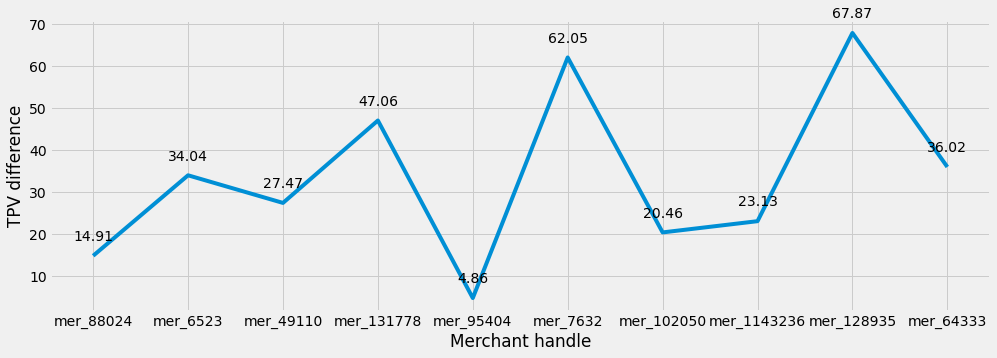

In [283]:
plt.plot(dom,tpv)
plt.xlabel('Merchant handle')
plt.ylabel('TPV difference')


for x,y in zip(dom,tpv):

    label = "{:.2f}".format(y)

    plt.annotate(label,
                 (x,y), 
                 textcoords="offset points",
                 xytext=(0,15),
                 ha='center')
    

## 10 Lagging customers by TPV

In [276]:
bottom10 = df4.nsmallest(10, 'diff')
bottom10

,domain_x,merchant_handle,tpv_x,tpv_y,diff,percent diff
1582,deliverr,mer_32408,1065702991.86,1935389151.56,-869686159.70,-44.94
4522,realvision,mer_139756,117513870.29,714163174.11,-596649303.82,-83.55
2692,"hunt-a-killer,huntakiller",mer_64196,223073817.60,593873614.47,-370799796.87,-62.44
2483,grin,mer_36612,367223250.24,629735928.55,-262512678.31,-41.69
154,"acloudguru-us,a-cloud-guru,acloudguru-uk",mer_79540,318571753.77,555961522.71,-237389768.94,-42.70
2040,ffern,mer_84313,-5017860.18,72972220.93,-77990081.11,-106.88
136,"able-uk,hint-us,hint-uk,able-us",mer_136963,333331094.43,409318399.24,-75987304.81,-18.56
5,"123kortse,123kort,123cards",mer_37714,27625002.68,81070373.96,-53445371.28,-65.92
520,avanan,mer_85761,31707316.43,84282136.75,-52574820.31,-62.38
3397,"macstadium-inc,macstadium,macstadium-ltd",mer_118964,178672682.00,230863154.52,-52190472.52,-22.61


In [290]:
percent_diff2 = (bottom10['tpv_x'].sum()-bottom10['tpv_y'].sum())/(bottom10['tpv_y'].sum())*100
percent_diff2

-49.913538038581606

In [281]:
dom2 = bottom10['merchant_handle']
tpv2= bottom10['percent diff']

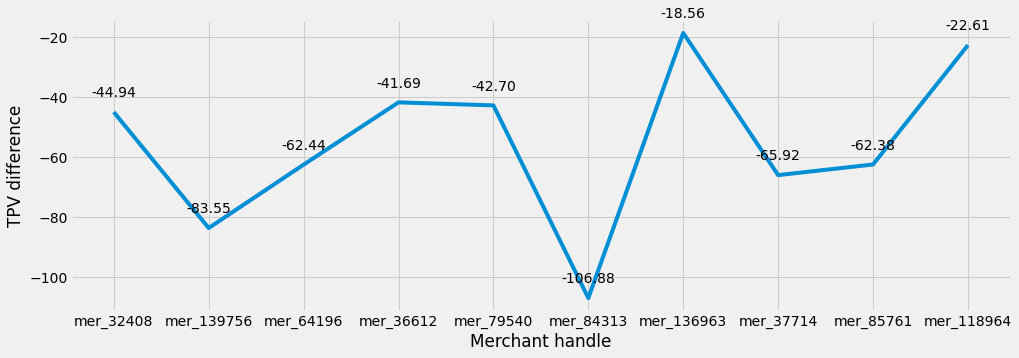

In [282]:
plt.plot(dom2,tpv2)
plt.xlabel('Merchant handle')
plt.ylabel('TPV difference')
for x,y in zip(dom2,tpv2):

    label = "{:.2f}".format(y)

    plt.annotate(label,
                 (x,y), 
                 textcoords="offset points",
                 xytext=(0,15),
                 ha='center')

### TPV increase from July'21 - Jan'22

In [ ]:
df.set_index('day', inplace = True)

In [338]:
df.head()

,merchant_id,gateway,tpv
day,,,
2020-10-01 00:00:00+00:00,5921,AMAZON_PAYMENTS,2110.80
2017-08-31 00:00:00+00:00,88024,WORLDPAY,112512.59
2017-04-20 00:00:00+00:00,6336,SAGE_PAY,2857.19
2021-11-17 00:00:00+00:00,107038,INGENICO_EPAYMENTS,733.52
2021-10-30 00:00:00+00:00,134614,PAYPAL_PAYFLOW_PRO,624.00


In [339]:
A = df['2021-07-01':'2021-07-31']['tpv'].sum()
B = df['2021-08-01':'2021-08-31']['tpv'].sum()

In [353]:
C = df['2021-09-01':'2021-09-30']['tpv'].sum()
D = df['2021-10-01':'2021-10-31']['tpv'].sum()
E = df['2021-11-01':'2021-11-30']['tpv'].sum()
F = df['2021-12-01':'2021-12-31']['tpv'].sum()
G = df['2022-01-01':'2022-01-31']['tpv'].sum()

In [393]:
tpv = [A,B, C, D, E, F, G]

In [394]:
tpv

[418944627.0579307,
 444286939.23924613,
 455775308.8087508,
 472704545.39072627,
 526223536.79199183,
 550350988.8399343,
 562019686.2285819]

In [347]:
#tpv = [df['2021-07-01':'2021-07-31']['tpv'].sum(), df['2021-12-01':'2021-12-31']['tpv'].sum()]

In [348]:
#tpv_sums = [df['2021-07-01':'2021-07-31']['tpv'].sum(),df['2021-08-01':'2021-08-31']['tpv'].sum(),df['2021-09-01':'2021-09-31']['tpv'].sum(),df['2021-10-01':'2021-10-31']['tpv'].sum(),df['2021-11-01':'2021-11-31']['tpv'].sum(),df['2021-12-01':'2021-12-31']['tpv'].sum(),df['2022-01-01':'2022-01-31']['tpv'].sum()]

In [349]:
months = []
months = ['July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', 'Jan']

In [381]:
plt.rcParams["figure.figsize"] = (10,4)

In [403]:
y = tpv

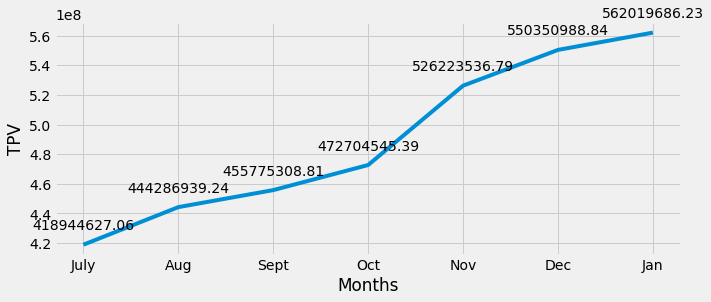

In [406]:
plt.plot(months, tpv)
plt.xlabel('Months')
plt.ylabel('TPV')


for x,y in zip(months,tpv):

    label = "{:.2f}".format(y)

    plt.annotate(label,
                 (x,y), 
                 textcoords="offset points",
                 xytext=(0,15),
                 ha='center')

In [558]:
plt.rcParams["figure.figsize"] = (7,4)

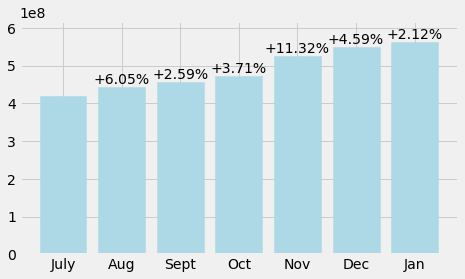

In [559]:
x = ['July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', 'Jan']
y = [418944627.0579307,
 444286939.23924613,
 455775308.8087508,
 472704545.39072627,
 526223536.79199183,
 550350988.8399343,
 562019686.2285819]

bars = plt.bar(x, y, fc='#ADD8E6', ec='#ADD8E6')
plt.bar_label(bars, [''] + [f'{(y1 - y0) / y0 * 100:+.2f}%' for y0, y1 in zip(y[:-1], y[1:])])
plt.margins(y=0.1)
plt.show()

### Top 100 customer's TPV trends

In [419]:
dff.head()

,gateway,tpv,merchant_handle,domain,Region,business_type,business_size,vertical,industry,business_model
day,,,,,,,,,,
2016-11-11 00:00:00+00:00,SAGE_PAY,647.42,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
2019-08-21 00:00:00+00:00,SAGE_PAY,1403.45,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
2019-04-17 00:00:00+00:00,SAGE_PAY,2419.27,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
2019-04-08 00:00:00+00:00,SAGE_PAY,1812.19,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
2018-08-16 00:00:00+00:00,SAGE_PAY,2736.97,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None


In [474]:
dffs = dff['2021-03':'2022']
dffs

,gateway,tpv,merchant_handle,domain,Region,business_type,business_size,vertical,industry,business_model
day,,,,,,,,,,
2021-05-19 00:00:00+00:00,STRIPE,2517.49,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
2021-05-28 00:00:00+00:00,STRIPE,5546.20,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
2021-10-04 00:00:00+00:00,STRIPE,2864.03,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
2021-04-16 00:00:00+00:00,STRIPE,2141.06,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
2021-04-13 00:00:00+00:00,STRIPE,3105.12,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
...,...,...,...,...,...,...,...,...,...,...
2021-06-29 00:00:00+00:00,STRIPE,1613.00,mer_130532,openoptions,AMER,SaaS,StartUp,Security,None,None
2021-05-04 00:00:00+00:00,NOT_APPLICABLE,800.00,mer_139712,plazbot,"OTHER,AMER",Others,StartUp,None,None,None
2021-06-21 00:00:00+00:00,NOT_APPLICABLE,1735.00,mer_1144279,alinefs,AMER,Others,StartUp,None,None,None


In [475]:
dffs.reset_index(inplace = True)
dffs

,day,gateway,tpv,merchant_handle,domain,Region,business_type,business_size,vertical,industry,business_model
0,2021-05-19 00:00:00+00:00,STRIPE,2517.49,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
1,2021-05-28 00:00:00+00:00,STRIPE,5546.20,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
2,2021-10-04 00:00:00+00:00,STRIPE,2864.03,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
3,2021-04-16 00:00:00+00:00,STRIPE,2141.06,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
4,2021-04-13 00:00:00+00:00,STRIPE,3105.12,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None
...,...,...,...,...,...,...,...,...,...,...,...
1582855,2021-06-29 00:00:00+00:00,STRIPE,1613.00,mer_130532,openoptions,AMER,SaaS,StartUp,Security,None,None
1582856,2021-05-04 00:00:00+00:00,NOT_APPLICABLE,800.00,mer_139712,plazbot,"OTHER,AMER",Others,StartUp,None,None,None
1582857,2021-06-21 00:00:00+00:00,NOT_APPLICABLE,1735.00,mer_1144279,alinefs,AMER,Others,StartUp,None,None,None
1582858,2021-08-14 00:00:00+00:00,NOT_APPLICABLE,345.00,mer_1146165,feras,EMEA,Others,StartUp,None,None,None


In [476]:
dffs['month'] = dffs['day'].dt.month_name()
dffs

,day,gateway,tpv,merchant_handle,domain,Region,business_type,business_size,vertical,industry,business_model,month
0,2021-05-19 00:00:00+00:00,STRIPE,2517.49,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None,May
1,2021-05-28 00:00:00+00:00,STRIPE,5546.20,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None,May
2,2021-10-04 00:00:00+00:00,STRIPE,2864.03,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None,October
3,2021-04-16 00:00:00+00:00,STRIPE,2141.06,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None,April
4,2021-04-13 00:00:00+00:00,STRIPE,3105.12,mer_6336,muddymatches,EMEA,Digital Services,StartUp,Others,Subscription Services,None,April
...,...,...,...,...,...,...,...,...,...,...,...,...
1582855,2021-06-29 00:00:00+00:00,STRIPE,1613.00,mer_130532,openoptions,AMER,SaaS,StartUp,Security,None,None,June
1582856,2021-05-04 00:00:00+00:00,NOT_APPLICABLE,800.00,mer_139712,plazbot,"OTHER,AMER",Others,StartUp,None,None,None,May
1582857,2021-06-21 00:00:00+00:00,NOT_APPLICABLE,1735.00,mer_1144279,alinefs,AMER,Others,StartUp,None,None,None,June
1582858,2021-08-14 00:00:00+00:00,NOT_APPLICABLE,345.00,mer_1146165,feras,EMEA,Others,StartUp,None,None,None,August


In [477]:
dffs = dffs.groupby(by=['domain',"merchant_handle", 'month'], as_index = False).sum()

In [478]:
dffs

,domain,merchant_handle,month,tpv
0,0patch,mer_55663,April,34760.32
1,0patch,mer_55663,August,44847.95
2,0patch,mer_55663,December,30605.73
3,0patch,mer_55663,February,10835.54
4,0patch,mer_55663,January,35648.12
...,...,...,...,...
77546,zzoota,mer_69572,March,9218.78
77547,zzoota,mer_69572,May,12734.48
77548,zzoota,mer_69572,November,10213.90
77549,zzoota,mer_69572,October,10142.93


In [484]:
dffs = dffs.groupby(by=['month'], as_index = False).sum()
dffs

,month,tpv
0,April,393461070.54
1,August,444207458.60
2,December,551340647.65
3,February,151361337.75
4,January,561887224.39
5,July,418866451.82
6,June,429068059.09
7,March,410379638.61
8,May,390921904.91
9,November,526147020.35


In [491]:
dffs["month"] = pd.to_datetime(dffs["month"], format = '%B')

In [492]:
dffss = dffs.sort_values("month")
dffss

,month,tpv
4,1900-01-01,561887224.39
3,1900-02-01,151361337.75
7,1900-03-01,410379638.61
0,1900-04-01,393461070.54
8,1900-05-01,390921904.91
6,1900-06-01,429068059.09
5,1900-07-01,418866451.82
1,1900-08-01,444207458.60
11,1900-09-01,455708373.51
10,1900-10-01,472629850.23


In [501]:
dffss.at[4,'month']

Timestamp('1900-01-01 00:00:00')

In [502]:
dffss.at[4,'month'] = '1901-01-01 00:00:00'

In [503]:
dffss = dffss.sort_values("month")
dffss

,month,tpv
3,1900-02-01,151361337.75
7,1900-03-01,410379638.61
0,1900-04-01,393461070.54
8,1900-05-01,390921904.91
6,1900-06-01,429068059.09
5,1900-07-01,418866451.82
1,1900-08-01,444207458.60
11,1900-09-01,455708373.51
10,1900-10-01,472629850.23
9,1900-11-01,526147020.35


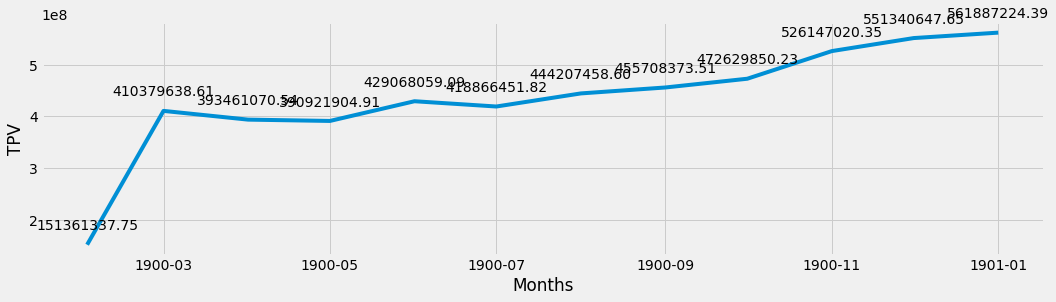

In [507]:
plt.plot(dffss.month, dffss.tpv)
plt.xlabel('Months')
plt.ylabel('TPV')

for x,y in zip(dffss.month,dffss.tpv):

    label = "{:.2f}".format(y)

    plt.annotate(label,
                 (x,y), 
                 textcoords="offset points",
                 xytext=(0,15),
                 ha='center')

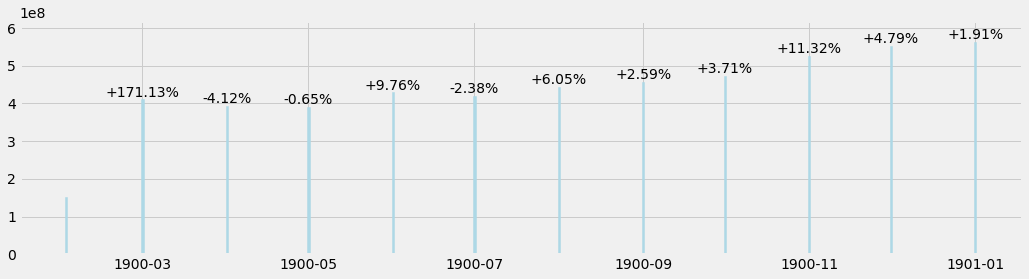

In [508]:
x = dffss.month
y = dffss.tpv
bars = plt.bar(x, y, fc='#ADD8E6', ec='#ADD8E6')
plt.bar_label(bars, [''] + [f'{(y1 - y0) / y0 * 100:+.2f}%' for y0, y1 in zip(y[:-1], y[1:])])
plt.margins(y=0.1)
plt.show()

In [515]:
df4.head()

,domain_x,merchant_handle,tpv_x,tpv_y,diff,percent diff
0,0patch,mer_55663,2245831.62,1928160.88,317670.74,16.48
1,101blockchains,mer_1152387,313270.10,360852.00,-47581.90,-13.19
2,10minuteswebsite,mer_66171,72435.87,79318.68,-6882.81,-8.68
3,11pets,mer_90638,75272.80,68798.84,6473.96,9.41
4,123creditresolutionconsultants,mer_24790,218502.48,137757.35,80745.13,58.61


In [517]:
top100 = df4.nlargest(100, 'diff')
top100

,domain_x,merchant_handle,tpv_x,tpv_y,diff,percent diff
2228,"freshdesk-aud,freshcaller,freshservice-gbp,fre...",mer_88024,5557559155.71,4836412600.04,721146555.67,14.91
920,"calendly-billing,calendly",mer_6523,1154002521.15,860947993.08,293054528.07,34.04
4148,personio,mer_49110,1226964281.57,962518333.15,264445948.42,27.47
1071,chiefpayments,mer_131778,775270041.00,527168640.00,248101401.00,47.06
5557,"theepochtimeseurope,ch-epochtimes,tasteshowcom...",mer_95404,3354049176.06,3198550037.50,155499138.57,4.86
5853,"tuxcare,imunify360,cloudlinux",mer_7632,319736515.05,197309977.59,122426537.46,62.05
405,"aprilss,estrid",mer_102050,718418396.07,596380298.31,122038097.76,20.46
4396,"provenstaging,proven",mer_1143236,594025749.68,482422310.93,111603438.75,23.13
3524,"memsource,phrase",mer_128935,160926880.92,95861551.05,65065329.87,67.87
6130,wakanim,mer_64333,239535428.93,176099905.27,63435523.66,36.02


In [537]:
top10_2 = top100.nlargest(10, 'diff')
top10_2

,domain_x,merchant_handle,tpv_x,tpv_y,diff,percent diff
2228,"freshdesk-aud,freshcaller,freshservice-gbp,fre...",mer_88024,5557559155.71,4836412600.04,721146555.67,14.91
920,"calendly-billing,calendly",mer_6523,1154002521.15,860947993.08,293054528.07,34.04
4148,personio,mer_49110,1226964281.57,962518333.15,264445948.42,27.47
1071,chiefpayments,mer_131778,775270041.00,527168640.00,248101401.00,47.06
5557,"theepochtimeseurope,ch-epochtimes,tasteshowcom...",mer_95404,3354049176.06,3198550037.50,155499138.57,4.86
5853,"tuxcare,imunify360,cloudlinux",mer_7632,319736515.05,197309977.59,122426537.46,62.05
405,"aprilss,estrid",mer_102050,718418396.07,596380298.31,122038097.76,20.46
4396,"provenstaging,proven",mer_1143236,594025749.68,482422310.93,111603438.75,23.13
3524,"memsource,phrase",mer_128935,160926880.92,95861551.05,65065329.87,67.87
6130,wakanim,mer_64333,239535428.93,176099905.27,63435523.66,36.02


In [546]:
plt.rcParams["figure.figsize"] = (15,4)

In [547]:
xA = top10_2['merchant_handle']
yA = top10_2['percent diff']

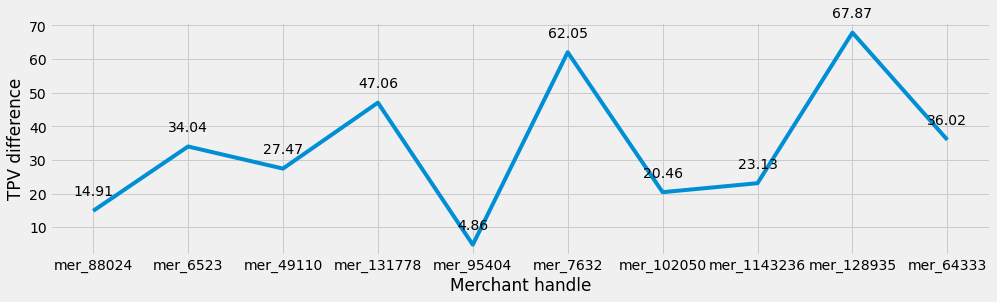

In [548]:
plt.plot(xA, yA)
plt.xlabel('Merchant handle')
plt.ylabel('TPV difference')


for x,y in zip(xA, yA):

    label = "{:.2f}".format(y)

    plt.annotate(label,
                 (x,y), 
                 textcoords="offset points",
                 xytext=(0,15),
                 ha='center')

In [552]:
bot10_2 = top100.nsmallest(10, 'diff')
bot10_2

,domain_x,merchant_handle,tpv_x,tpv_y,diff,percent diff
5259,"storehub-rm-con,storehub-aud,storehub-rm,storehub",mer_2067,52300021.78,44837132.70,7462889.08,16.64
6139,wati,mer_1143415,30133479.50,22608246.48,7525233.02,33.29
5485,testgorilla,mer_102344,25795906.46,18146988.76,7648917.70,42.15
2849,interplaylearning,mer_55901,22603758.51,14854516.69,7749241.82,52.17
1957,"executestrategy,executestrategy-au",mer_16071,41064429.16,33270273.16,7794156.00,23.43
2682,"hubiloindia,hubilovirtual,hubilov2stg",mer_132494,30015455.24,22195822.57,7819632.67,35.23
1784,easypep,mer_31338,18420601.83,10375268.66,8045333.17,77.54
323,amn-ds,mer_39577,49179627.83,41119620.25,8060007.58,19.60
3514,"meisterplan,meisterplan-usa",mer_38798,25524696.99,17430517.82,8094179.17,46.44
815,bravopawnsystems,mer_80824,44130486.04,35937156.69,8193329.35,22.80


In [553]:
xB = bot10_2['merchant_handle']
yB = bot10_2['percent diff']

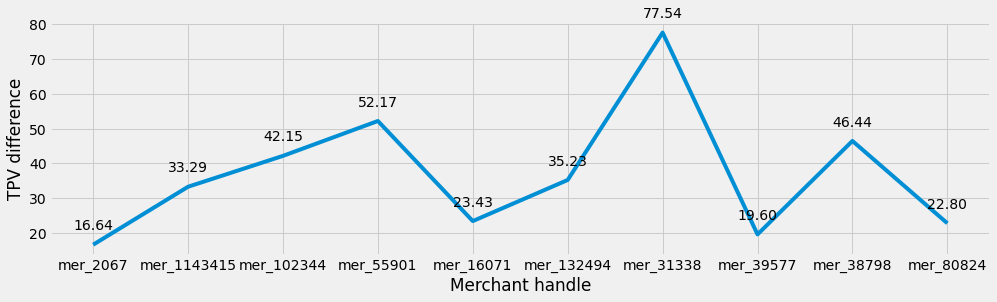

In [551]:
plt.plot(xB, yB)
plt.xlabel('Merchant handle')
plt.ylabel('TPV difference')


for x,y in zip(xB, yB):

    label = "{:.2f}".format(y)

    plt.annotate(label,
                 (x,y), 
                 textcoords="offset points",
                 xytext=(0,15),
                 ha='center')